In [480]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [481]:
# Read monthly trade data
df_trade = pd.read_csv('../data/processed/monthly_TradeData.csv')

df_trade

,Period,ReporterISO,PartnerISO,PrimaryValue
0,2015-01-01,DZA,USA,2.628566e+03
1,2015-01-01,AGO,FRA,4.950500e+02
2,2015-01-01,AGO,NAM,2.426630e+03
3,2015-01-01,AGO,USA,6.091000e+01
4,2015-01-01,AZE,NLD,3.215760e+03
...,...,...,...,...
460991,2018-12-01,TWN,EGY,8.331526e+04
460992,2018-12-01,TWN,GBR,8.721823e+06
460993,2018-12-01,TWN,TZA,2.768410e+05
460994,2018-12-01,TWN,USA,3.439689e+08


In [482]:
# Group by reporting country and sum the trade values
trade_by_reporting_country = df_trade.groupby('ReporterISO')['PrimaryValue'].sum()

trade_by_reporting_country

ReporterISO
AGO    2.382276e+06
ALB    8.112405e+04
AND    3.978929e+07
ARE    8.434236e+08
ARG    9.478488e+06
           ...     
WSM    4.518200e+01
YEM    5.530604e+03
ZAF    2.411924e+08
ZMB    2.613275e+05
ZWE    3.844527e+04
Name: PrimaryValue, Length: 145, dtype: float64

In [483]:
# Group by partner country and sum the trade values
trade_by_partner_country = df_trade.groupby('PartnerISO')['PrimaryValue'].sum()

trade_by_partner_country

PartnerISO
AFG    4.012432e+07
AGO    3.354418e+07
ALB    2.919203e+07
AND    1.439052e+08
ARE    2.956472e+09
           ...     
WSM    1.268012e+06
YEM    3.217160e+06
ZAF    1.790314e+09
ZMB    1.170873e+07
ZWE    1.184751e+07
Name: PrimaryValue, Length: 192, dtype: float64

In [484]:
# Sort and get top 10 reporting countries by trade value
top_reporting_countries = trade_by_reporting_country.sort_values(ascending=False).head(10)

top_reporting_countries

ReporterISO
TWN    1.943498e+12
SGP    8.432283e+11
KOR    5.830200e+11
CHN    5.212084e+11
USA    4.998982e+11
MYS    3.817034e+11
JPN    3.451441e+11
DEU    1.882087e+11
PHL    1.753438e+11
NLD    9.106825e+10
Name: PrimaryValue, dtype: float64

In [485]:
# Sort and get top 10 partner countries by trade value
top_partner_countries = trade_by_partner_country.sort_values(ascending=False).head(10)

top_partner_countries

PartnerISO
CHN    1.978833e+12
SGP    6.321965e+11
TWN    4.943473e+11
KOR    4.173157e+11
MYS    3.995356e+11
USA    2.971338e+11
JPN    2.775750e+11
VNM    2.696706e+11
DEU    1.843798e+11
MEX    1.543108e+11
Name: PrimaryValue, dtype: float64

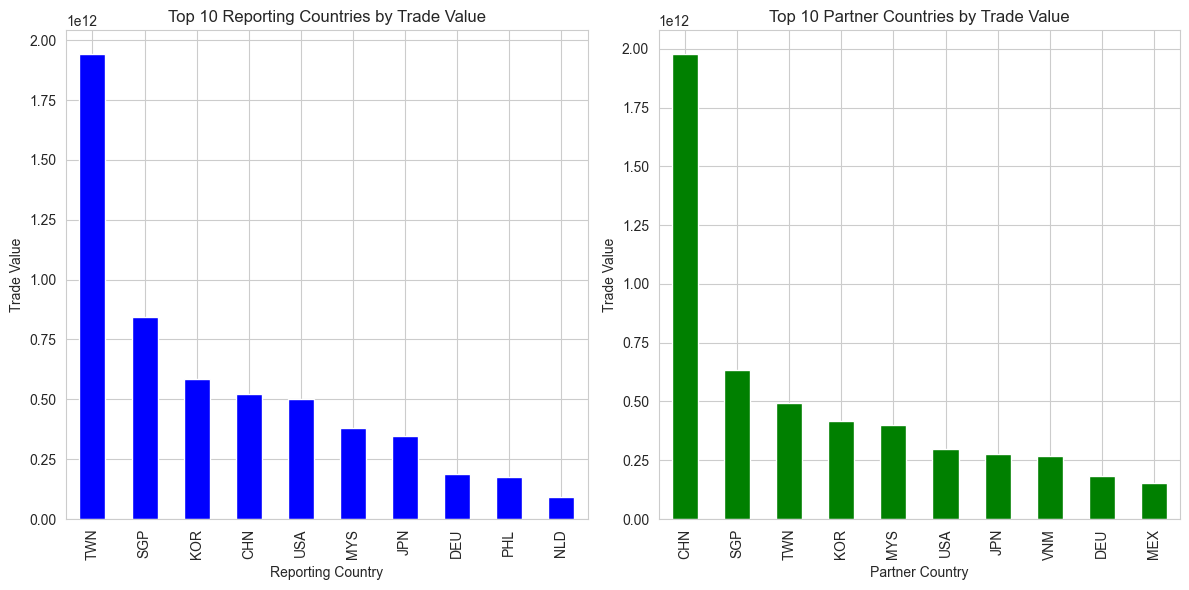

In [486]:
import matplotlib.pyplot as plt

# Assuming top_reporting_countries and top_partner_countries are pandas Series

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot top reporting countries
top_reporting_countries.plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title('Top 10 Reporting Countries by Trade Value')
axes[0].set_xlabel('Reporting Country')
axes[0].set_ylabel('Trade Value')

# Plot top partner countries
top_partner_countries.plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Top 10 Partner Countries by Trade Value')
axes[1].set_xlabel('Partner Country')
axes[1].set_ylabel('Trade Value')

plt.tight_layout()
plt.show()


In [487]:
# Convert 'Period' to datetime format
df_trade['Period'] = pd.to_datetime(df_trade['Period'])

# Set date as index
df_trade.set_index('Period', inplace=True)

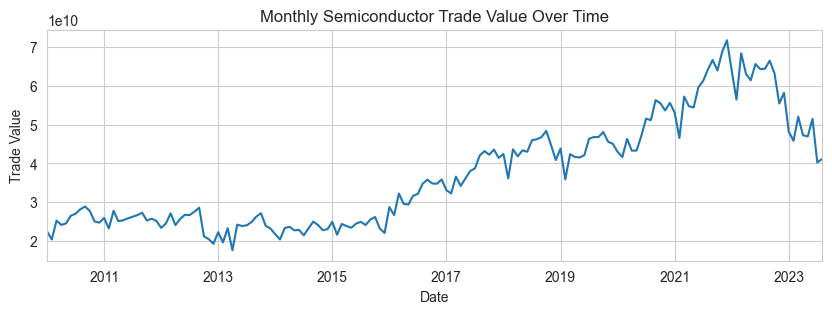

In [488]:
# Resample and aggregate trade values by month
monthly_trade = df_trade.resample('M')['PrimaryValue'].sum()

# Plot trend over time
plt.figure(figsize=(10, 3))  # Optional: Set figure size for better readability
monthly_trade.plot(title='Monthly Semiconductor Trade Value Over Time')
plt.xlabel('Date')
plt.ylabel('Trade Value')
plt.grid(True)  # Optional: Add grid for better readability
plt.show()

monthly_trade = monthly_trade.to_frame()
monthly_trade.to_csv('../data/processed/monthly_WorldTrade.csv')

In [489]:
monthly_trade

,PrimaryValue
Period,
2010-01-31,2.240636e+10
2010-02-28,2.033400e+10
2010-03-31,2.518405e+10
2010-04-30,2.410615e+10
2010-05-31,2.447201e+10
...,...
2023-04-30,4.725996e+10
2023-05-31,4.695919e+10
2023-06-30,5.150474e+10


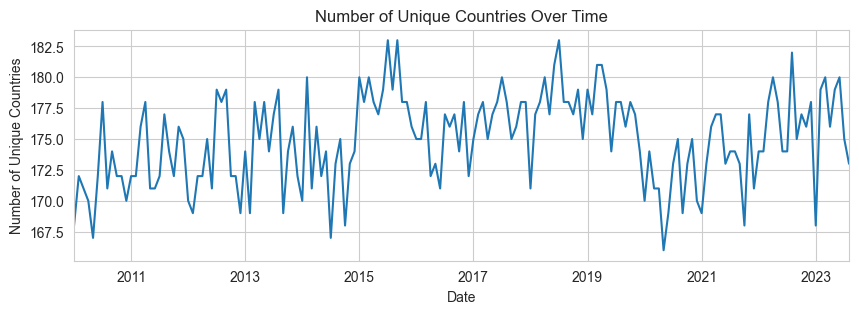

In [490]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the integer column to datetime format
#df['Period'] = pd.to_datetime(df['Period'], format='%Y%m')

# Define a function to calculate the number of unique countries
def unique_countries_per_period(df):
    # Combine PartnerISO and ReporterISO into one series and get unique values
    combined = df[['PartnerISO', 'ReporterISO']].stack().unique()
    return len(combined)

# Group by period and apply the function
unique_countries = df_trade.groupby(df_trade.index.to_period('M')).apply(unique_countries_per_period)

# Plot the trend over time
plt.figure(figsize=(10, 3))  # Optional: Set figure size for better readability
unique_countries.plot(title='Number of Unique Countries Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Unique Countries')
plt.grid(True)  # Optional: Add grid for better readability
plt.show()


In [491]:
unique_countries

Period
2010-01    168
2010-02    172
2010-03    171
2010-04    170
2010-05    167
          ... 
2023-04    176
2023-05    179
2023-06    180
2023-07    175
2023-08    173
Freq: M, Length: 164, dtype: int64

In [492]:
# De-index the 'Period' column and reset index
df_trade = df_trade.reset_index()
df_trade

,Period,ReporterISO,PartnerISO,PrimaryValue
0,2015-01-01,DZA,USA,2.628566e+03
1,2015-01-01,AGO,FRA,4.950500e+02
2,2015-01-01,AGO,NAM,2.426630e+03
3,2015-01-01,AGO,USA,6.091000e+01
4,2015-01-01,AZE,NLD,3.215760e+03
...,...,...,...,...
460991,2018-12-01,TWN,EGY,8.331526e+04
460992,2018-12-01,TWN,GBR,8.721823e+06
460993,2018-12-01,TWN,TZA,2.768410e+05
460994,2018-12-01,TWN,USA,3.439689e+08


### Network
Construct network of each period
Remove unimportant nodes
Calculate the structure properties of Network for each period 

Compare which way would be better to remove unimportant nodes -- with closeness centrality the nodes are better divided

/Users/ouharuhua/anaconda3/envs/Code_for_thesis/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
/var/folders/pj/59k0gxhn4sn0yrsml90mvxnr0000gn/T/ipykernel_19541/3749456330.py:41: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Centrality')


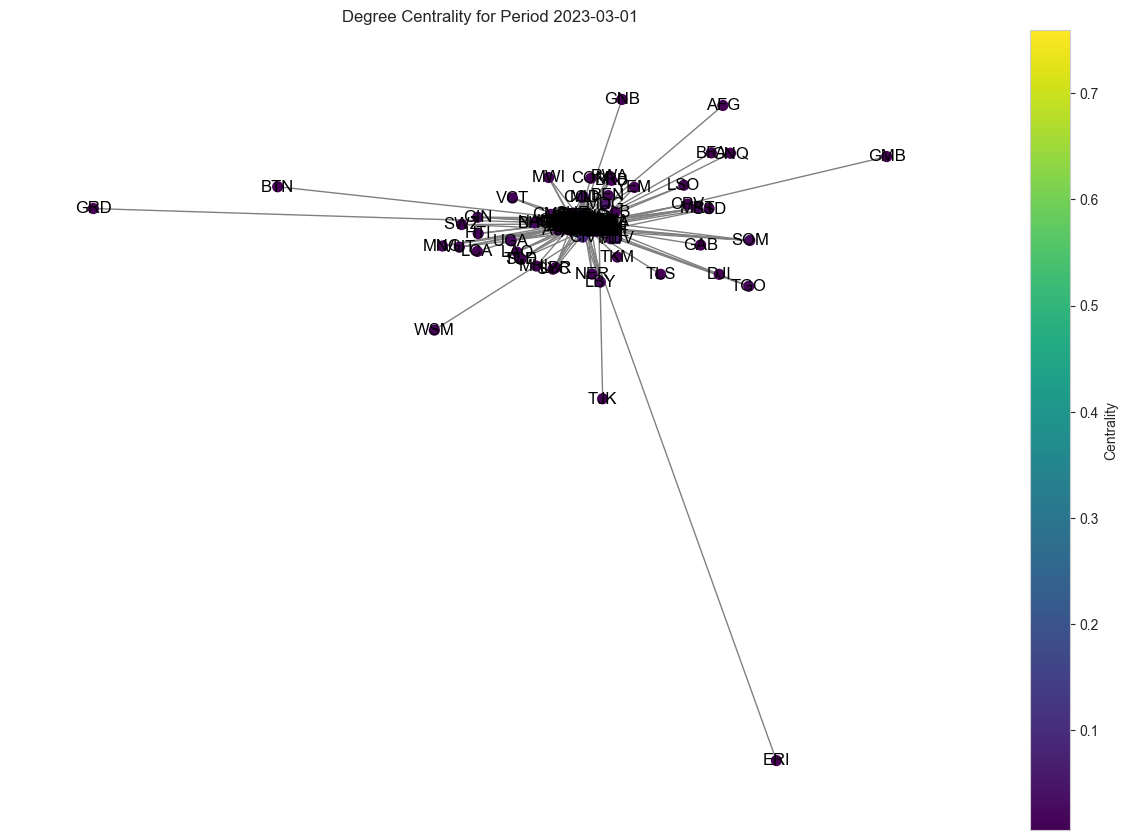

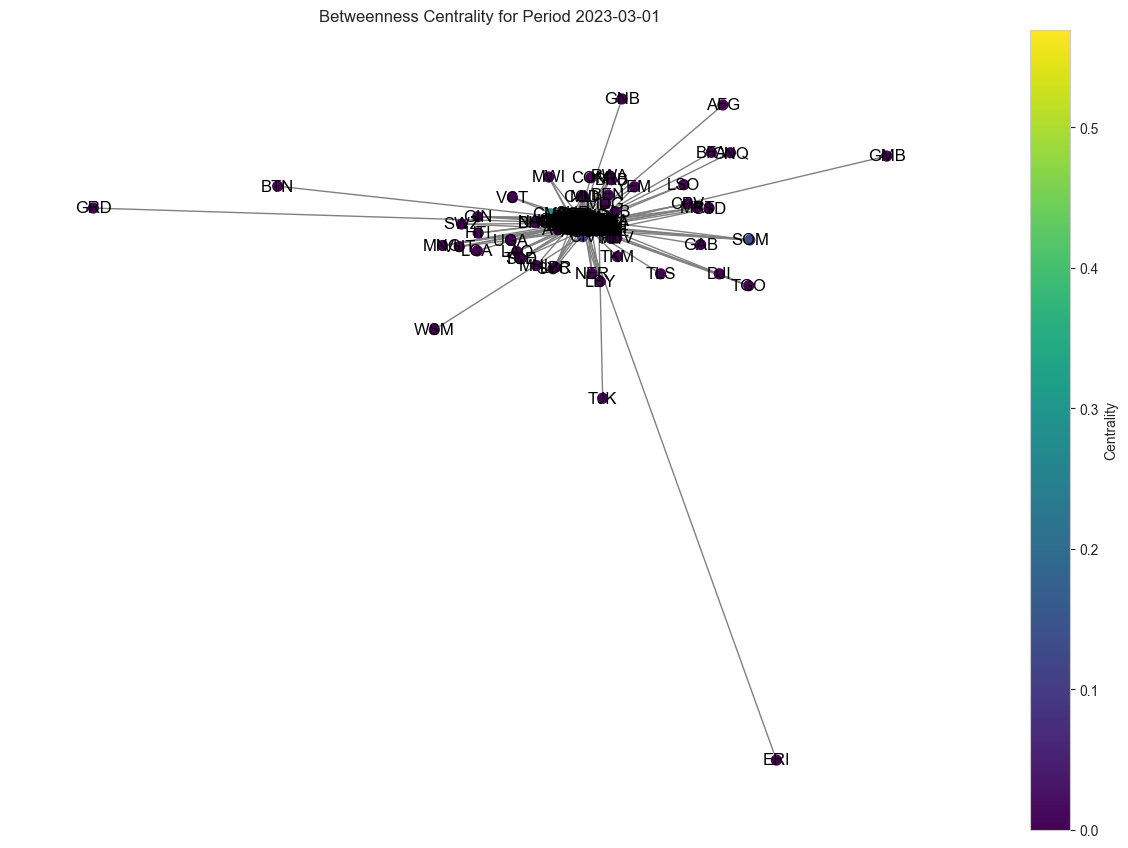

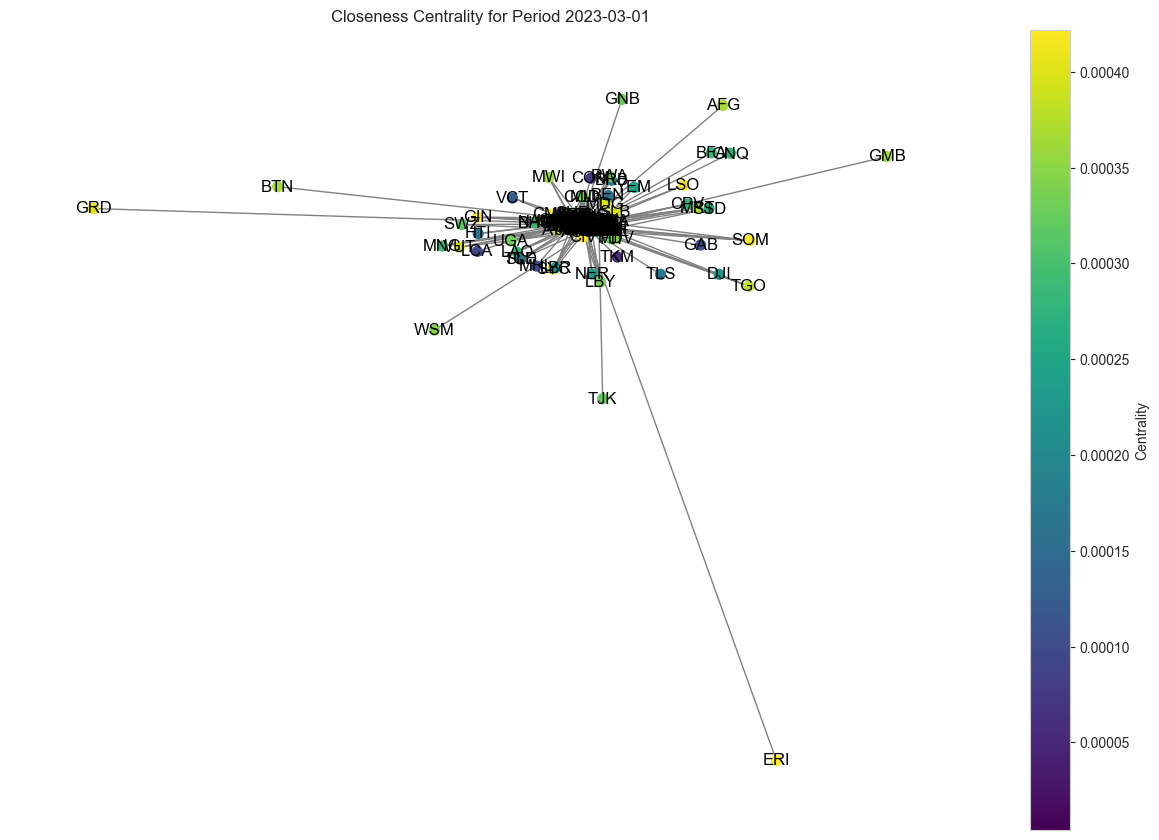

In [493]:

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm

# Function to create and compute centrality for a specific period
def create_and_compute_centrality_for_period(df, period):
    # Filter data for the specific period
    period_data = df[df['Period'] == period]

    # Create a graph
    G = nx.Graph()

    # Add nodes and edges with trade values
    for _, row in period_data.iterrows():
        G.add_edge(row['ReporterISO'], row['PartnerISO'], weight=row['PrimaryValue'])

    # Calculate centrality measures
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
    closeness_centrality = nx.closeness_centrality(G, distance='weight')

    return G, degree_centrality, betweenness_centrality, closeness_centrality

# Function to plot the network with centrality measures
def plot_network_with_centrality(G, centrality, title, pos=None):
    plt.figure(figsize=(12, 8))
    if pos is None:
        pos = nx.spring_layout(G, seed=42)  # Positioning nodes using a spring layout
    
    # Normalize centrality values for coloring
    centrality_values = np.array(list(centrality.values()))
    norm = plt.Normalize(centrality_values.min(), centrality_values.max())
    node_colors = [cm.viridis(norm(centrality[node])) for node in G.nodes()]

    # Draw the network
    nx.draw(G, pos, node_size=50, edge_color='gray', with_labels=True, node_color=node_colors, cmap=cm.viridis)
    sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, label='Centrality')
    plt.title(title)
    plt.show()

# Apply to chosen periods
chosen_periods = ['2023-03-01']

for period in chosen_periods:
    # Create and compute centrality for the period
    G, degree_centrality, betweenness_centrality, closeness_centrality = create_and_compute_centrality_for_period(df_trade, period)

    # Plot the network with degree centrality
    plot_network_with_centrality(G, degree_centrality, f'Degree Centrality for Period {period}')

    # Plot the network with betweenness centrality
    plot_network_with_centrality(G, betweenness_centrality, f'Betweenness Centrality for Period {period}')

    # Plot the network with closeness centrality
    plot_network_with_centrality(G, closeness_centrality, f'Closeness Centrality for Period {period}')


In [494]:
# import networkx as nx
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# 
# # Function to create and filter network for a specific period
# def create_and_filter_network_for_period(df, period):
#     # Filter data for the specific period
#     period_data = df[df['Period'] == period]
# 
#     # Create a graph
#     G = nx.Graph()
# 
#     # Add nodes and edges with trade values
#     for _, row in period_data.iterrows():
#         G.add_edge(row['ReporterISO'], row['PartnerISO'], weight=row['PrimaryValue'])
# 
#     # Calculate weighted degrees
#     weighted_degrees = {node: sum(data['weight'] for _, _, data in G.edges(node, data=True)) for node in G.nodes()}
# 
#     # Convert weighted degrees to a list
#     weighted_degrees_values = list(weighted_degrees.values())
# 
#     # Calculate the 25th percentile of weighted degrees
#     percentile_25th = np.percentile(weighted_degrees_values, 25)
# 
#     # Nodes to be removed based on the percentile threshold
#     nodes_to_remove = [node for node, weighted_degree in weighted_degrees.items() if weighted_degree < percentile_25th]
# 
#     # Filter the original period data to exclude rows with removed nodes
#     filtered_period_data = period_data[
#         (~period_data['ReporterISO'].isin(nodes_to_remove)) & 
#         (~period_data['PartnerISO'].isin(nodes_to_remove))
#     ]
# 
#     return G, filtered_period_data, nodes_to_remove, percentile_25th
# 
# # Initialize lists and dictionaries
# filtered_data_list = []
# nodes_to_remove_dict = {}
# network_sets = {}
# 
# # Apply to each period
# unique_periods = df_trade['Period'].unique()
# 
# for period in unique_periods:
#     G, filtered_period_data, nodes_to_remove, percentile_25th = create_and_filter_network_for_period(df_trade, period)
#     
#     # Append filtered data for each period to the list
#     filtered_data_list.append(filtered_period_data)
#     
#     # Store nodes to remove for the current period
#     nodes_to_remove_dict[period] = nodes_to_remove
#     
#     # Store the network for the current period
#     network_sets[f'network_{period}'] = G
# 
# # Combine filtered data for all periods
# monthly_trade_filtered = pd.concat(filtered_data_list)


In [495]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Function to create and filter network for a specific period
def create_and_filter_network_for_period(df, period):
    # Filter data for the specific period
    period_data = df[df['Period'] == period]

    # Create a graph
    G = nx.Graph()

    # Add nodes and edges with trade values
    for _, row in period_data.iterrows():
        G.add_edge(row['ReporterISO'], row['PartnerISO'], weight=row['PrimaryValue'])

    # Compute closeness centrality
    closeness_centrality = nx.closeness_centrality(G)

    # Convert closeness centrality to a list
    closeness_values = list(closeness_centrality.values())

    # Calculate the 25th percentile of closeness centrality
    percentile_25th = np.percentile(closeness_values, 25)

    # Nodes to be removed based on the percentile threshold
    nodes_to_remove = [node for node, centrality in closeness_centrality.items() if centrality < percentile_25th]

    # Filter the original period data to exclude rows with removed nodes
    filtered_period_data = period_data[
        (~period_data['ReporterISO'].isin(nodes_to_remove)) & 
        (~period_data['PartnerISO'].isin(nodes_to_remove))
    ]

    return G, filtered_period_data, nodes_to_remove, percentile_25th

# Initialize lists and dictionaries
filtered_data_list = []
nodes_to_remove_dict = {}
network_sets = {}

# Apply to each period
unique_periods = df_trade['Period'].unique()

for period in unique_periods:
    G, filtered_period_data, nodes_to_remove, percentile_25th = create_and_filter_network_for_period(df_trade, period)
    
    # Append filtered data for each period to the list
    filtered_data_list.append(filtered_period_data)
    
    # Store nodes to remove for the current period
    nodes_to_remove_dict[period] = nodes_to_remove
    
    # Store the network for the current period
    network_sets[f'network_{period}'] = G
    

# Combine filtered data for all periods
monthly_trade_filtered = pd.concat(filtered_data_list)
monthly_trade_filtered.to_csv('../data/processed/df_trade_filtered.csv')


In [496]:
# Print nodes to remove dictionary
print(nodes_to_remove_dict)

# Create a DataFrame for nodes to remove
nodes_to_remove_df = pd.DataFrame([(period, node) for period, nodes in nodes_to_remove_dict.items() for node in nodes], columns=['Period', 'RemovedNode'])

# Group by the 'RemovedNode' column and count occurrences
node_counts = nodes_to_remove_df.groupby('RemovedNode').size().reset_index(name='Count')

# Sort by the count in descending order (optional)
node_counts = node_counts.sort_values(by='Count', ascending=False)
print(node_counts)

{Timestamp('2015-01-01 00:00:00'): ['PRY', 'NRU', 'TUV', 'BHS', 'SLE', 'BRB', 'GRD', 'COD', 'CUB', 'HND', 'SOM', 'HTI', 'SSD', 'MWI', 'MLI', 'NER', 'AFG', 'BRN', 'MRT', 'SYC', 'TGO', 'NIC', 'MDV', 'KGZ', 'LAO', 'BDI', 'CAF', 'GNB', 'MMR', 'KHM', 'CPV', 'DJI', 'GMB', 'WSM', 'PRK', 'STP', 'BTN', 'LSO', 'SWZ', 'SYR', 'KIR', 'VCT', 'KNA', 'PLW'], Timestamp('2015-02-01 00:00:00'): ['SLB', 'VUT', 'PNG', 'MDV', 'SMR', 'KHM', 'GUY', 'LBR', 'COD', 'MRT', 'TCD', 'DJI', 'GAB', 'GIN', 'ATG', 'LBY', 'SOM', 'SDN', 'TKM', 'LAO', 'CAF', 'BEN', 'GNQ', 'NER', 'GNB', 'WSM', 'PRK', 'JAM', 'GMB', 'STP', 'SYC', 'VCT', 'BTN', 'DMA', 'LSO', 'MWI', 'SWZ', 'HTI', 'SLE', 'BRB', 'BLZ', 'GRD', 'KNA', 'PLW'], Timestamp('2015-03-01 00:00:00'): ['AND', 'VUT', 'PNG', 'TLS', 'BOL', 'TTO', 'BEN', 'NIC', 'GAB', 'MWI', 'MOZ', 'HTI', 'TUV', 'SLE', 'COM', 'GIN', 'NAM', 'TGO', 'KGZ', 'SOM', 'SDN', 'SYR', 'TJK', 'GRD', 'SWZ', 'BDI', 'CAF', 'TCD', 'NER', 'GNB', 'ATG', 'LBR', 'ZWE', 'WSM', 'PRK', 'CPV', 'VCT', 'MMR', 'MNG', 'LS

In [497]:
monthly_trade_filtered.to_csv('../data/processed/df_trade_filtered.csv')

# Display the final filtered DataFrame
monthly_trade_filtered #463301

,Period,ReporterISO,PartnerISO,PrimaryValue
0,2015-01-01,DZA,USA,2.628566e+03
1,2015-01-01,AGO,FRA,4.950500e+02
2,2015-01-01,AGO,NAM,2.426630e+03
3,2015-01-01,AGO,USA,6.091000e+01
4,2015-01-01,AZE,NLD,3.215760e+03
...,...,...,...,...
460990,2018-12-01,TWN,MKD,7.819281e+04
460991,2018-12-01,TWN,EGY,8.331526e+04
460992,2018-12-01,TWN,GBR,8.721823e+06
460993,2018-12-01,TWN,TZA,2.768410e+05


In [498]:
monthly_trade_filtered

,Period,ReporterISO,PartnerISO,PrimaryValue
0,2015-01-01,DZA,USA,2.628566e+03
1,2015-01-01,AGO,FRA,4.950500e+02
2,2015-01-01,AGO,NAM,2.426630e+03
3,2015-01-01,AGO,USA,6.091000e+01
4,2015-01-01,AZE,NLD,3.215760e+03
...,...,...,...,...
460990,2018-12-01,TWN,MKD,7.819281e+04
460991,2018-12-01,TWN,EGY,8.331526e+04
460992,2018-12-01,TWN,GBR,8.721823e+06
460993,2018-12-01,TWN,TZA,2.768410e+05


In [499]:
# Print nodes_to_remove_dict
print("Nodes to Remove by Period:")
print(nodes_to_remove_dict)

# Create DataFrame for removed nodes
nodes_to_remove_df = pd.DataFrame([(period, node) for period, nodes in nodes_to_remove_dict.items() for node in nodes], columns=['Period', 'RemovedNode'])

# Group by the 'RemovedNode' column and count occurrences
node_counts = nodes_to_remove_df.groupby('RemovedNode').size().reset_index(name='Count')

# Sort by the count in descending order
node_counts = node_counts.sort_values(by='Count', ascending=False)

node_counts

Nodes to Remove by Period:
{Timestamp('2015-01-01 00:00:00'): ['PRY', 'NRU', 'TUV', 'BHS', 'SLE', 'BRB', 'GRD', 'COD', 'CUB', 'HND', 'SOM', 'HTI', 'SSD', 'MWI', 'MLI', 'NER', 'AFG', 'BRN', 'MRT', 'SYC', 'TGO', 'NIC', 'MDV', 'KGZ', 'LAO', 'BDI', 'CAF', 'GNB', 'MMR', 'KHM', 'CPV', 'DJI', 'GMB', 'WSM', 'PRK', 'STP', 'BTN', 'LSO', 'SWZ', 'SYR', 'KIR', 'VCT', 'KNA', 'PLW'], Timestamp('2015-02-01 00:00:00'): ['SLB', 'VUT', 'PNG', 'MDV', 'SMR', 'KHM', 'GUY', 'LBR', 'COD', 'MRT', 'TCD', 'DJI', 'GAB', 'GIN', 'ATG', 'LBY', 'SOM', 'SDN', 'TKM', 'LAO', 'CAF', 'BEN', 'GNQ', 'NER', 'GNB', 'WSM', 'PRK', 'JAM', 'GMB', 'STP', 'SYC', 'VCT', 'BTN', 'DMA', 'LSO', 'MWI', 'SWZ', 'HTI', 'SLE', 'BRB', 'BLZ', 'GRD', 'KNA', 'PLW'], Timestamp('2015-03-01 00:00:00'): ['AND', 'VUT', 'PNG', 'TLS', 'BOL', 'TTO', 'BEN', 'NIC', 'GAB', 'MWI', 'MOZ', 'HTI', 'TUV', 'SLE', 'COM', 'GIN', 'NAM', 'TGO', 'KGZ', 'SOM', 'SDN', 'SYR', 'TJK', 'GRD', 'SWZ', 'BDI', 'CAF', 'TCD', 'NER', 'GNB', 'ATG', 'LBR', 'ZWE', 'WSM', 'PRK', 'CPV

,RemovedNode,Count
52,LSO,159
47,KNA,154
23,CPV,143
76,SLB,129
36,GNQ,129
...,...,...
38,GTM,1
1,AGO,1
78,SLV,1
42,IRQ,1


In [500]:
network_sets

{'network_2015-01-01 00:00:00': <networkx.classes.graph.Graph at 0x3a33ae400>,
 'network_2015-02-01 00:00:00': <networkx.classes.graph.Graph at 0x309a18790>,
 'network_2015-03-01 00:00:00': <networkx.classes.graph.Graph at 0x3a3d72460>,
 'network_2015-04-01 00:00:00': <networkx.classes.graph.Graph at 0x300d45f10>,
 'network_2015-05-01 00:00:00': <networkx.classes.graph.Graph at 0x31da4de80>,
 'network_2015-06-01 00:00:00': <networkx.classes.graph.Graph at 0x31daf6cd0>,
 'network_2015-07-01 00:00:00': <networkx.classes.graph.Graph at 0x17dbc5760>,
 'network_2015-08-01 00:00:00': <networkx.classes.graph.Graph at 0x302721c40>,
 'network_2015-09-01 00:00:00': <networkx.classes.graph.Graph at 0x327073d90>,
 'network_2015-10-01 00:00:00': <networkx.classes.graph.Graph at 0x313fb6100>,
 'network_2015-11-01 00:00:00': <networkx.classes.graph.Graph at 0x31da4d190>,
 'network_2015-12-01 00:00:00': <networkx.classes.graph.Graph at 0x302721f10>,
 'network_2014-01-01 00:00:00': <networkx.classes.gr

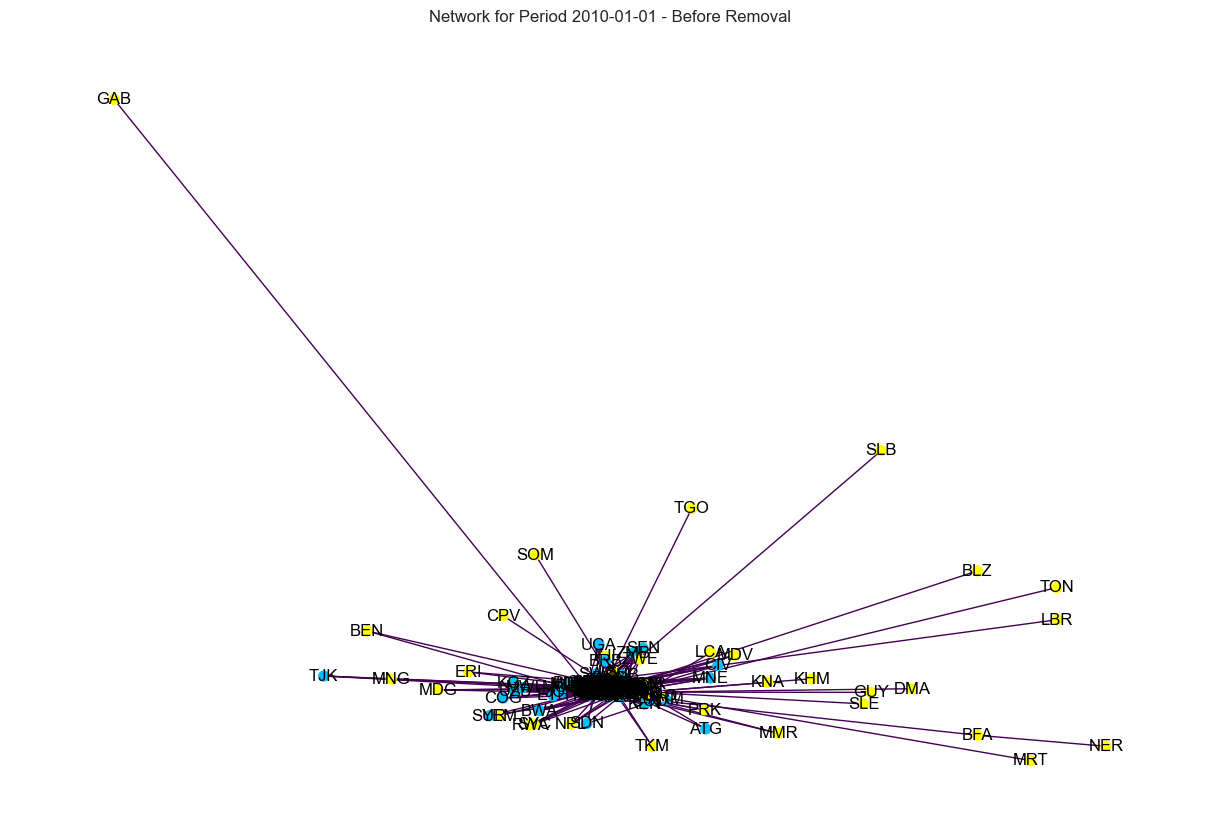

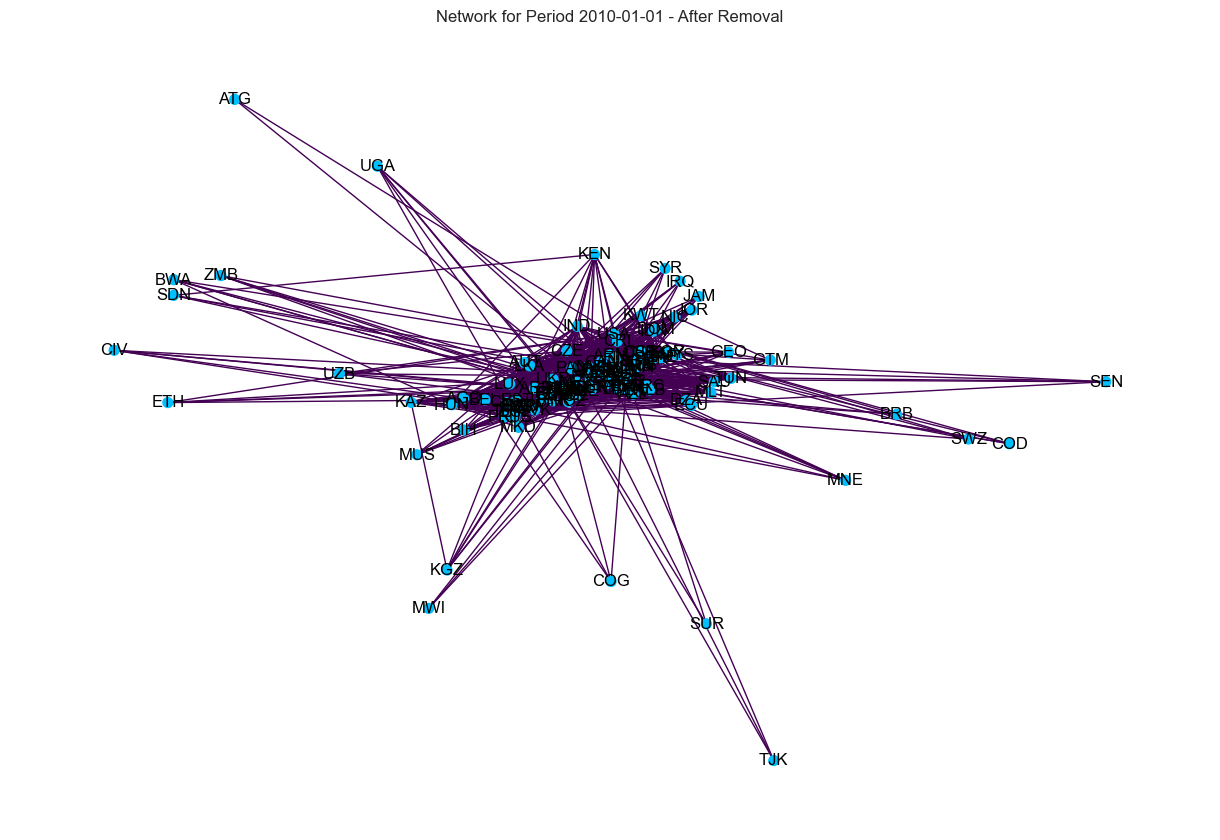

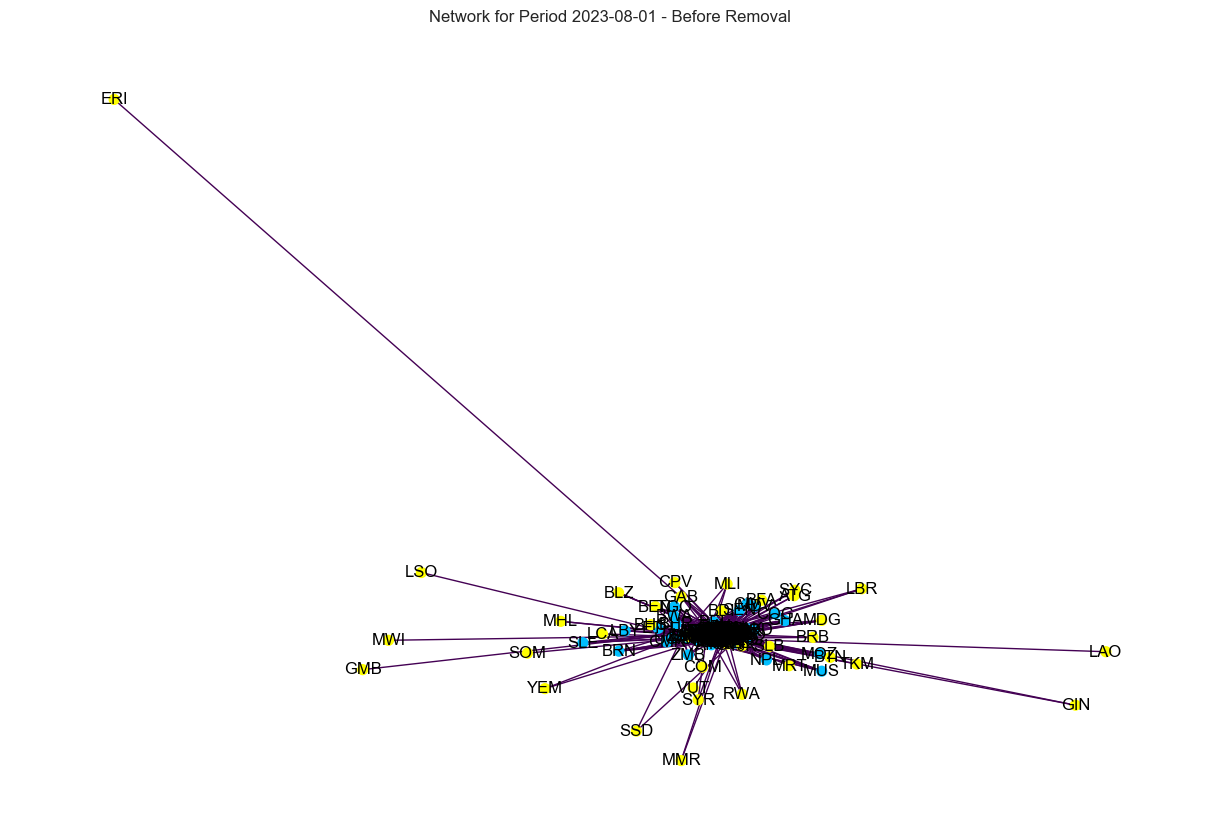

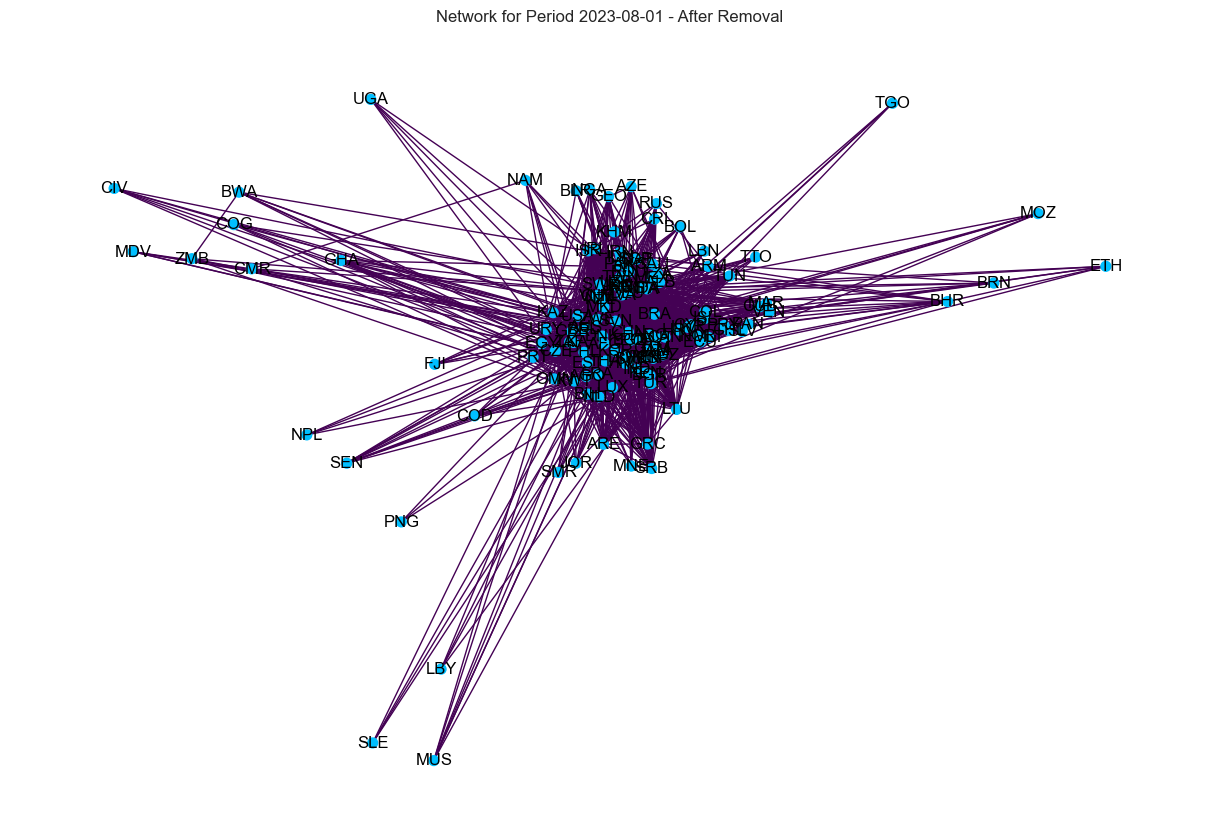

In [501]:
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler

# Function to plot the network
def plot_network(G, title, pos=None, nodes_to_highlight=None):
    plt.figure(figsize=(12, 8))
    if pos is None:
        pos = nx.spring_layout(G, seed=42)  # Positioning nodes using a spring layout
    
    nodes_to_highlight=nodes_to_remove
    
    # Determine node colors
    node_colors = ['yellow' if node in nodes_to_highlight else 'deepskyblue' for node in G.nodes()]
    
    # Edge weights and colors
    scaler = MinMaxScaler()
    edge_weights = np.array([data['weight'] for _, _, data in G.edges(data=True)])
    scaled_weights = scaler.fit_transform(edge_weights.reshape(-1, 1)).flatten()
    edge_colors = [cm.viridis(weight) for weight in scaled_weights]


    #edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]
    #max_edge_weight = max(edge_weights) if edge_weights else 1  # Avoid division by zero
    #edge_colors = [cm.viridis(weight / max_edge_weight) for weight in edge_weights]

    # Draw the network
    nx.draw(G, pos, node_size=50, edge_color=edge_colors, with_labels=True, node_color=node_colors)
    plt.title(title)
    plt.show()

# Apply to chosen periods
chosen_periods = ['2010-01-01', '2023-08-01']

for period in chosen_periods:
    # Filter data for the specific period
    original_data = df_trade[df_trade['Period'] == period]
    
    # Create and filter network for the period
    G, filtered_data, nodes_to_remove, percentile_25th = create_and_filter_network_for_period(df_trade, period)

    # Create graphs for plotting
    G_original = nx.Graph()
    for _, row in original_data.iterrows():
        G_original.add_edge(row['ReporterISO'], row['PartnerISO'], weight=row['PrimaryValue'])

    G_filtered = nx.Graph()
    for _, row in filtered_data.iterrows():
        G_filtered.add_edge(row['ReporterISO'], row['PartnerISO'], weight=row['PrimaryValue'])

    # Plot the network before removal
    plot_network(G_original, f'Network for Period {period} - Before Removal', nodes_to_highlight=nodes_to_remove)

    # Plot the network after removal
    plot_network(G_filtered, f'Network for Period {period} - After Removal', nodes_to_highlight=None)

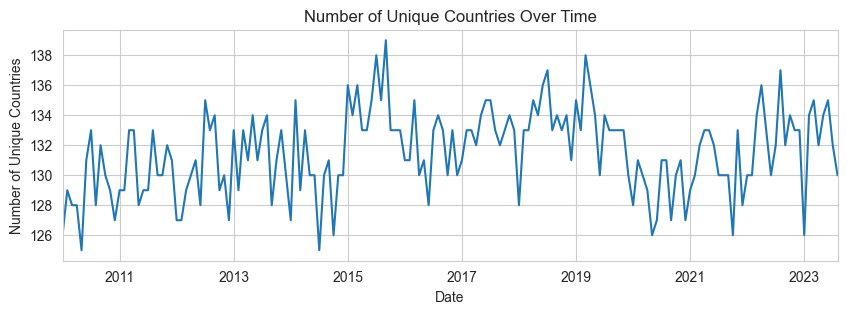

In [502]:
import pandas as pd
import matplotlib.pyplot as plt

# Set date as index
monthly_trade_filtered.set_index('Period', inplace=True)

# Group by period and apply the function
unique_countries = monthly_trade_filtered.groupby(monthly_trade_filtered.index.to_period('M')).apply(unique_countries_per_period)

# Plot the trend over time
plt.figure(figsize=(10, 3))  # Optional: Set figure size for better readability
unique_countries.plot(title='Number of Unique Countries Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Unique Countries')
plt.grid(True)  # Optional: Add grid for better readability
plt.show()


### Network structure properties over time

In [503]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Initialize lists to store the number of nodes and edges
num_nodes_list = []
num_edges_list = []

# Iterate through the network sets
for subset_name, subset_graph in network_sets.items():
    # Extract the period from the subset name
    period = subset_name.split('_')[1]
    period_dt = pd.to_datetime(period)
    
    # Append the number of nodes and edges to the lists
    num_nodes_list.append((period_dt, subset_graph.number_of_nodes()))
    num_edges_list.append((period_dt, subset_graph.number_of_edges()))

# Sort the lists based on the period
num_nodes_list.sort(key=lambda x: x[0])
num_edges_list.sort(key=lambda x: x[0])


In [504]:

# Initialize lists to store the density, avg_clustering, assortativity
density_list = []
avg_clustering_list = []
assortativity_list = []

# Iterate through the subsets
for subset_name, subset_graph in network_sets.items():
    # Extract the period from the subset name
    period = subset_name.split('_')[1]
    period_dt = pd.to_datetime(period)
    
    # Calculate the metrics and append to the lists
    density_list.append((period_dt, nx.density(subset_graph)))
    avg_clustering_list.append((period_dt, nx.average_clustering(subset_graph)))
    assortativity_list.append((period_dt, nx.degree_assortativity_coefficient(subset_graph)))

# Sort the lists based on the period
density_list.sort(key=lambda x: x[0])
avg_clustering_list.sort(key=lambda x: x[0])
assortativity_list.sort(key=lambda x: x[0])


In [505]:
# Initialize lists to store avg shortest path length
avg_shortest_path_list = []

# Iterate through the subsets
for subset_name, subset_graph in network_sets.items():
    # Extract the period from the subset name
    period = subset_name.split('_')[1]
    period_dt = pd.to_datetime(period)
    
    # Calculate the metrics and append to the lists
    # Check if the graph is connected before computing average shortest path
    if nx.is_connected(subset_graph):
        avg_shortest_path_list.append((period_dt, nx.average_shortest_path_length(subset_graph)))
    else:
        avg_shortest_path_list.append((period_dt, None))  # Mark as missing value for disconnected graphs
    
# Sort the lists based on the period
avg_shortest_path_list.sort(key=lambda x: x[0])


### Construct Structure properties matrix

In [506]:
# Create a DataFrame
properties = pd.DataFrame({
    'Period': [item[0] for item in num_nodes_list], 
    'num_nodes': [item[1] for item in num_nodes_list],
    'num_edges': [item[1] for item in num_edges_list],
    'density': [item[1] for item in density_list],
    'clustering': [item[1] for item in avg_clustering_list],
    'assortativity': [item[1] for item in assortativity_list],
    'shortest_path': [item[1] for item in avg_shortest_path_list]
})

# Set 'period' as the index
# properties.set_index('Period', inplace=True)

# Save to csv
properties.to_csv('../data/processed/properties.csv',index=False)

In [507]:
properties

,Period,num_nodes,num_edges,density,clustering,assortativity,shortest_path
0,2010-01-01,168,1828,0.130311,0.712998,-0.444260,2.078985
1,2010-02-01,172,1838,0.124983,0.760005,-0.468762,2.061200
2,2010-03-01,171,1923,0.132301,0.776834,-0.466797,2.032542
3,2010-04-01,170,1850,0.128785,0.713454,-0.467922,2.069474
4,2010-05-01,167,1876,0.135344,0.773232,-0.462863,2.023086
...,...,...,...,...,...,...,...
159,2023-04-01,176,2060,0.133766,0.755452,-0.476133,2.014156
160,2023-05-01,179,2172,0.136338,0.756473,-0.486812,2.003955
161,2023-06-01,180,2127,0.132030,0.768839,-0.487065,2.027871
162,2023-07-01,175,2021,0.132742,0.725456,-0.482282,2.023580


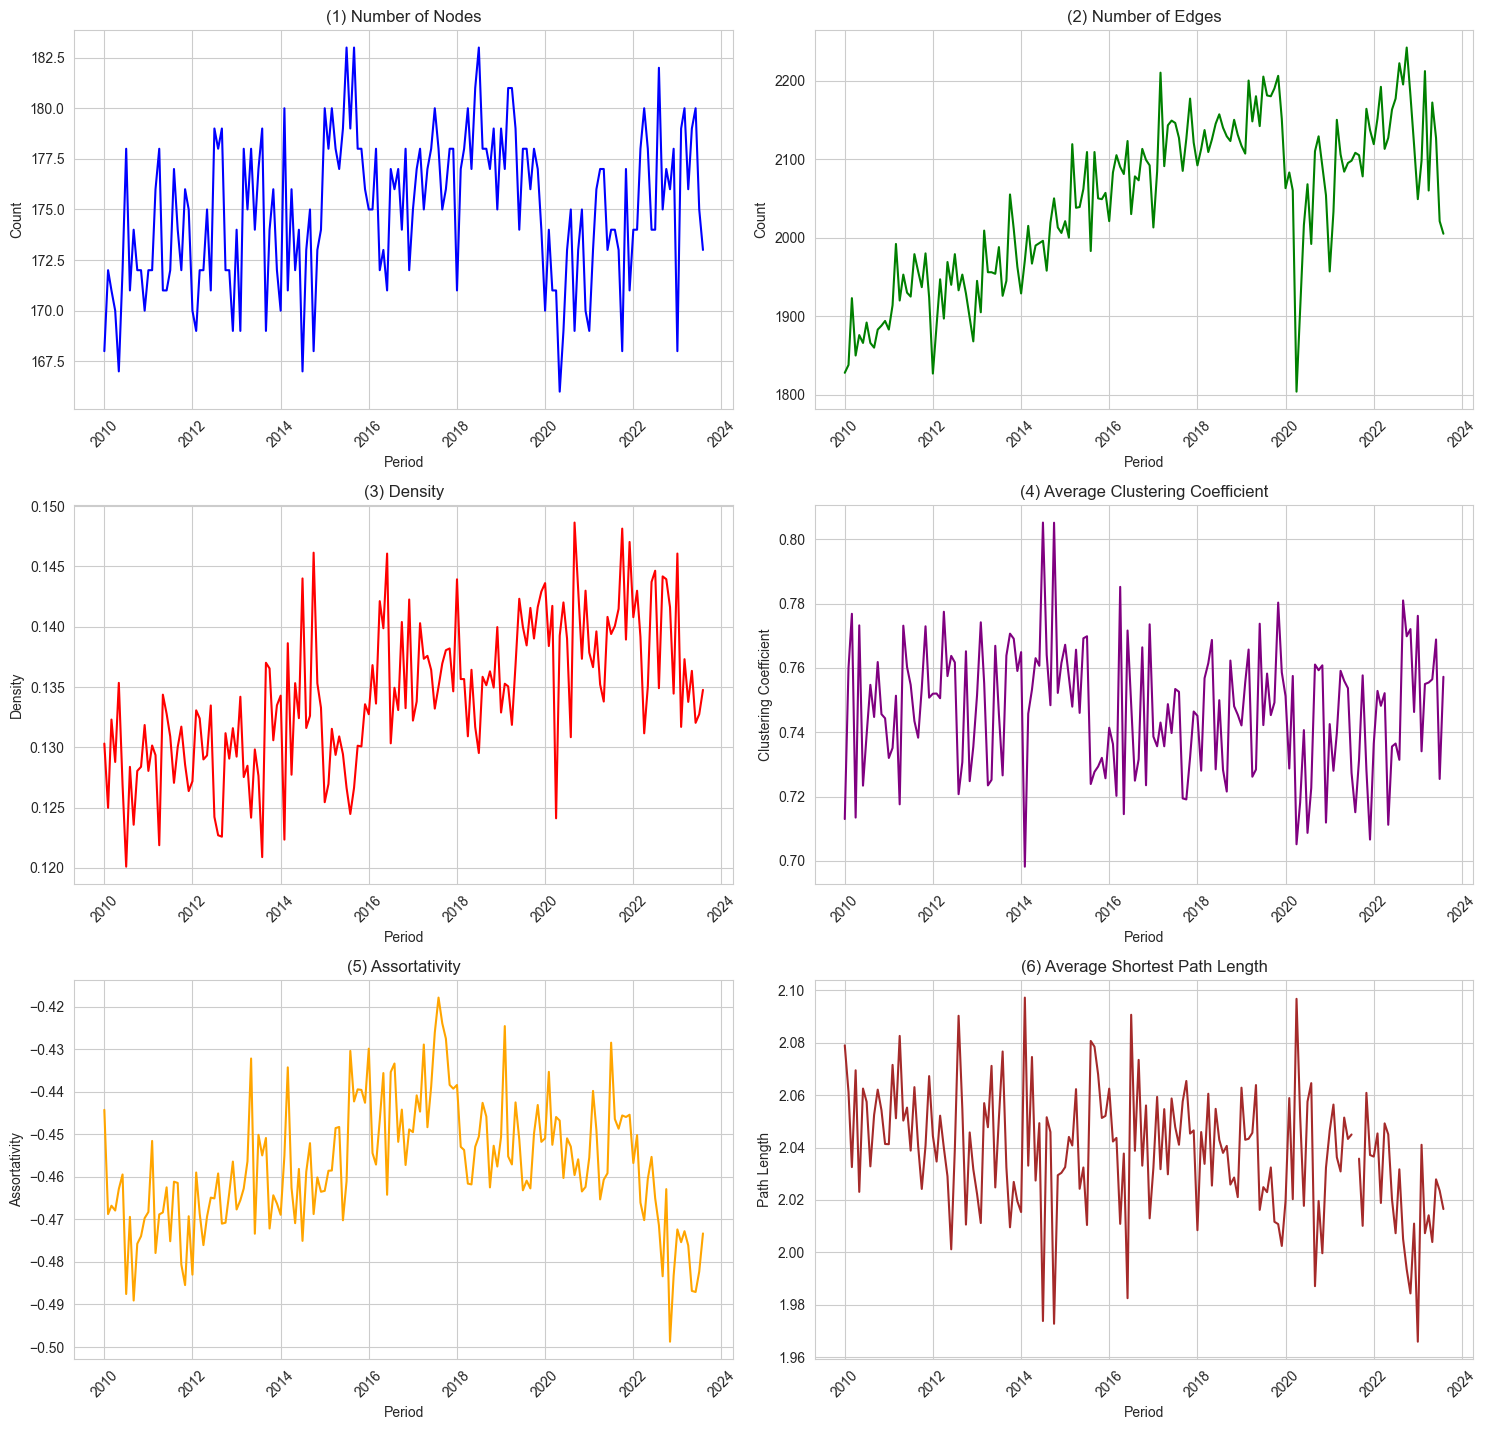

In [517]:
# Plot each column
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
# fig.suptitle('Network Properties Over Time')

# Titles and labels for each subplot
titles = ['(1) Number of Nodes', '(2) Number of Edges', '(3) Density', '(4) Average Clustering Coefficient', '(5) Assortativity', '(6) Average Shortest Path Length']
ylabels = ['Count', 'Count', 'Density', 'Clustering Coefficient', 'Assortativity', 'Path Length']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# Plot properties
for i, ax in enumerate(axs.flat):
    ax.plot(properties['Period'], properties[properties.columns[i + 1]], label=titles[i], color=colors[i])
    ax.set_title(titles[i])
    ax.set_xlabel('Period')
    ax.set_ylabel(ylabels[i])
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()

In [509]:
# Get the descriptive table for properties
properties.describe()

,Period,num_nodes,num_edges,density,clustering,assortativity,shortest_path
count,164,164.000000,164.000000,164.000000,164.000000,164.000000,163.000000
mean,2016-10-15 19:19:01.463414528,174.969512,2043.890244,0.134320,0.746868,-0.457477,2.038319
min,2010-01-01 00:00:00,166.000000,1804.000000,0.120104,0.698179,-0.498748,1.965925
25%,2013-05-24 06:00:00,172.000000,1957.000000,0.130118,0.731484,-0.468008,2.023894
50%,2016-10-16 12:00:00,175.000000,2060.000000,0.133994,0.748467,-0.458713,2.040529
75%,2020-03-08 18:00:00,178.000000,2123.500000,0.138706,0.760697,-0.448502,2.054455
max,2023-08-01 00:00:00,183.000000,2242.000000,0.148633,0.805208,-0.417882,2.097207
std,NaN,3.664494,101.956686,0.006075,0.019565,0.014767,0.023881


In [510]:
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Period         164 non-null    datetime64[ns]
 1   num_nodes      164 non-null    int64         
 2   num_edges      164 non-null    int64         
 3   density        164 non-null    float64       
 4   clustering     164 non-null    float64       
 5   assortativity  164 non-null    float64       
 6   shortest_path  163 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 9.1 KB
